**Using the DecisionTreeClassifier algorithm from sklearn to determine if the salary of a person is greater than 50K **

The unique values of the features:
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [1]:
import pandas as pd

In [2]:
!mkdir data && curl -o data/adult.data.csv -LJO https://github.com/dianaartiom/machine_learning_with_python/raw/main/lesson03/notebooks/data/adult.data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 3436k  100 3436k    0     0  3016k      0  0:00:01  0:00:01 --:--:-- 3016k


In [54]:
data = pd.read_csv('data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Preprocessing the data: 


In [55]:
# Preprocessing methods:


#Education num-represents the quality of the education of an individual. Higher the degree, higher the education num.
#Thus, the Education column is useless.
data=data.drop(['education'], axis=1);

#Fnlwgt represents the number of people that can be included in the specified record.
#This feature is useless for determining the salary of a specific individual.
data=data.drop(['fnlwgt'], axis=1);

#There is a connection between the 'relatioship' and the 'salary' of an individual (The higher the salary, the greater the possibility of being married).
#But, the 'marital-status' column is useless, because it reflects the same info as in 'relationship', but with greater details.
data=data.drop(['marital-status'], axis=1);



#Transform all string entries to numerical label alternatives:

from sklearn.preprocessing import LabelEncoder

def map_column(column_name):
  global data
  array=data[column_name].values
  le=LabelEncoder();
  le.fit(array);
  #print(array); 
  array2=le.transform(array);
  #print(array2);
  dct=dict(zip(array, array2));
  #print(dct)
  data[column_name]=data[column_name].replace(dct);


types=dict( data.dtypes )
#print(types);

for column in data:
  if types[column]!=type(128):
    map_column(column);


print(data);


{'age': dtype('int64'), 'workclass': dtype('O'), 'education-num': dtype('int64'), 'occupation': dtype('O'), 'relationship': dtype('O'), 'race': dtype('O'), 'sex': dtype('O'), 'capital-gain': dtype('int64'), 'capital-loss': dtype('int64'), 'hours-per-week': dtype('int64'), 'native-country': dtype('O'), 'salary': dtype('O')}
       age  workclass  education-num  occupation  relationship  race  sex  \
0       39          7             13           1             1     4    1   
1       50          6             13           4             0     4    1   
2       38          4              9           6             1     4    1   
3       53          4              7           6             0     2    1   
4       28          4             13          10             5     2    0   
...    ...        ...            ...         ...           ...   ...  ...   
32556   27          4             12          13             5     4    0   
32557   40          4              9           7           

Separate the dataset into features and the target values.

In [56]:



X=data.drop(['salary'], axis=1).values;
y =data['salary'].values

print(X);
print(y);


[[39  7 13 ...  0 40 39]
 [50  6 13 ...  0 13 39]
 [38  4  9 ...  0 40 39]
 ...
 [58  4  9 ...  0 40 39]
 [22  4  9 ...  0 20 39]
 [52  5  9 ...  0 40 39]]
[0 0 0 ... 0 0 1]


Divide the dataset in training and test sets.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42);

Instantiate a DecisionTreeClassifier, imported from sklearn.tree and train it.

In [65]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=42, max_depth=10);
classifier.fit(X_train, y_train);

Calculate the accuracy, precision, and recall of the built model.

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, classification_report, accuracy_score, confusion_matrix, recall_score, precision_score
y_train_hat =classifier.predict(X_train)
y_train_hat_probs =classifier.predict_proba(X_train)[:,1];

train_accuracy =accuracy_score(y_train, y_train_hat)*100;
train_auc_roc =roc_auc_score(y_train, y_train_hat)*100;
train_recall =recall_score(y_train, y_train_hat)*100;
train_precision =precision_score(y_train, y_train_hat)*100;



print('Training accuracy: %.4f %%' % train_accuracy)

print('Recall score: %.4f %%' % train_recall)

print('Precision score: %.4f %%' % train_precision)


y_test_hat =classifier.predict(X_test)
y_test_hat_probs =classifier.predict_proba(X_test)[:,1];

test_accuracy =accuracy_score(y_test, y_test_hat)*100;
test_auc_roc =roc_auc_score(y_test, y_test_hat)*100;
test_recall =recall_score(y_test, y_test_hat)*100;
test_precision =precision_score(y_test, y_test_hat)*100;



print('\nTesting accuracy: %.4f %%' % test_accuracy)

print('Recall score: %.4f %%' % test_recall)

print('Precision score: %.4f %%' % test_precision)

Training accuracy: 87.0854 %
Recall score: 60.6220 %
Precision score: 80.9412 %

Testing accuracy: 85.5213 %
Recall score: 58.6251 %
Precision score: 75.8649 %


Using *plot_tree* from *sklearn* to visuzlize the created decision tree.

[Text(0.6046981292517006, 0.9545454545454546, 'X[4] <= 0.5\ngini = 0.366\nsamples = 26048\nvalue = [19778, 6270]'),
 Text(0.3457518424036281, 0.8636363636363636, 'X[2] <= 12.5\ngini = 0.495\nsamples = 10603\nvalue = [5855, 4748]'),
 Text(0.2406108276643991, 0.7727272727272727, 'X[7] <= 5095.5\ngini = 0.442\nsamples = 7420\nvalue = [4972, 2448]'),
 Text(0.19550736961451248, 0.6818181818181818, 'X[8] <= 1782.5\ngini = 0.418\nsamples = 7062\nvalue = [4964, 2098]'),
 Text(0.13251133786848074, 0.5909090909090909, 'X[2] <= 9.5\ngini = 0.403\nsamples = 6795\nvalue = [4892, 1903]'),
 Text(0.06490929705215419, 0.5, 'X[2] <= 7.5\ngini = 0.343\nsamples = 4312\nvalue = [3364, 948]'),
 Text(0.030045351473922902, 0.4090909090909091, 'X[9] <= 43.5\ngini = 0.176\nsamples = 1046\nvalue = [944, 102]'),
 Text(0.01473922902494331, 0.3181818181818182, 'X[3] <= 11.5\ngini = 0.141\nsamples = 797\nvalue = [736, 61]'),
 Text(0.009070294784580499, 0.22727272727272727, 'X[3] <= 4.5\ngini = 0.118\nsamples = 654\n

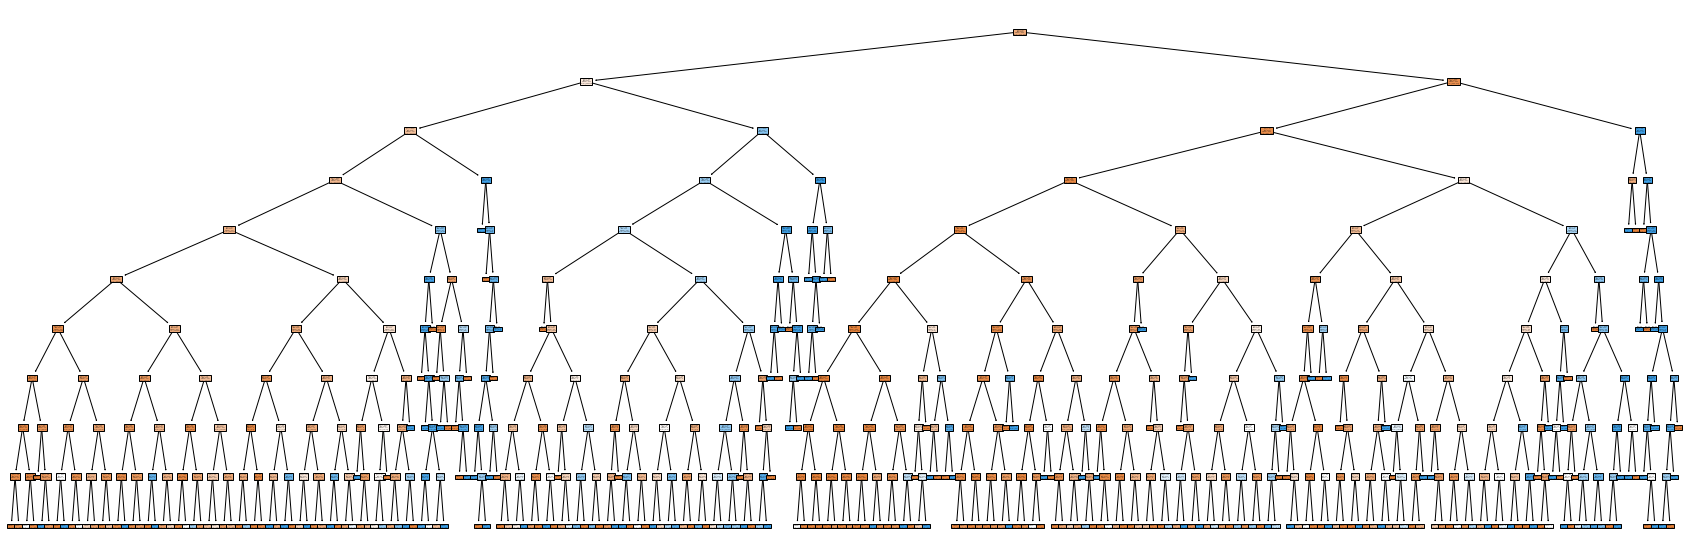

In [67]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))

tree.plot_tree(classifier, filled=True)